# Heart Failure Prediction

Medical Real World Problem Statement :- 

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

If we are able to make a machine learning model, then this will help in early detection and people can be saved.

We have to predict a person death event using some features:-
    
   -  Age ,Gender , blood pressure, smoke, diabetes,ejection fraction, creatinine phosphokinase, serum_creatinine, serum_sodium, time  
   
Dataset link:- https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

## Let's Start        

# Exploring Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.shape

(299, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Data Analysis

Total no. of living cases:  203
Total no. of dead cases:  96


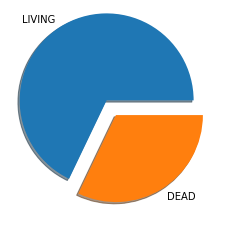

In [7]:
len_live=len(data["DEATH_EVENT"][data.DEATH_EVENT==0])
len_death=len(data["DEATH_EVENT"][data.DEATH_EVENT==1])

arr=np.array([len_live, len_death])
labels=['LIVING','DEAD']
print('Total no. of living cases: ',len_live)
print('Total no. of dead cases: ',len_death)

plt.pie(arr, labels=labels, explode=[0.2,0.0], shadow=True)
plt.show()

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


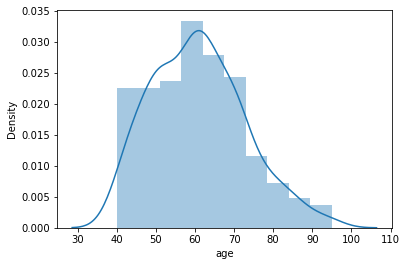

In [8]:
sns.distplot(data['age'])
plt.show()

Total no. of not dead cases above 50:  167
Total no. of dead cases above 50:  85


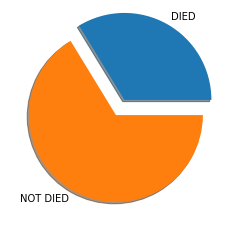

In [9]:
age_above_50_not_died=data['DEATH_EVENT'][data.age>=50][data.DEATH_EVENT==0]
age_above_50_died=data['DEATH_EVENT'][data.age>=50][data.DEATH_EVENT==1]

len_died=len(age_above_50_died)
len_not_died=len(age_above_50_not_died)

arr1=[len_died, len_not_died]
labels=['DIED','NOT DIED']
print('Total no. of not dead cases above 50: ',len_not_died)
print('Total no. of dead cases above 50: ',len_died)

plt.pie(arr1, labels=labels, explode=[0.2,0.0], shadow=True)
plt.show()

Total no. of patients died with diabetes:  40
Total no. of patients does not died with diabetes:  85


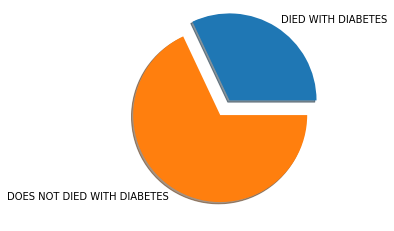

In [10]:
patient_have_diabetes_alive=data['DEATH_EVENT'][data.diabetes==1][data.DEATH_EVENT==0]
patient_have_diabetes_dead=data['DEATH_EVENT'][data.diabetes==1][data.DEATH_EVENT==1]

len_d_died=len(patient_have_diabetes_dead)
len_d_alive=len(patient_have_diabetes_alive)

arr2=[len_d_died, len_d_alive]
labels=['DIED WITH DIABETES','DOES NOT DIED WITH DIABETES']
print('Total no. of patients died with diabetes: ',len_d_died)
print('Total no. of patients does not died with diabetes: ',len_d_alive)

plt.pie(arr2, labels=labels, explode=[0.2,0.0], shadow=True)
plt.show()

<AxesSubplot:>

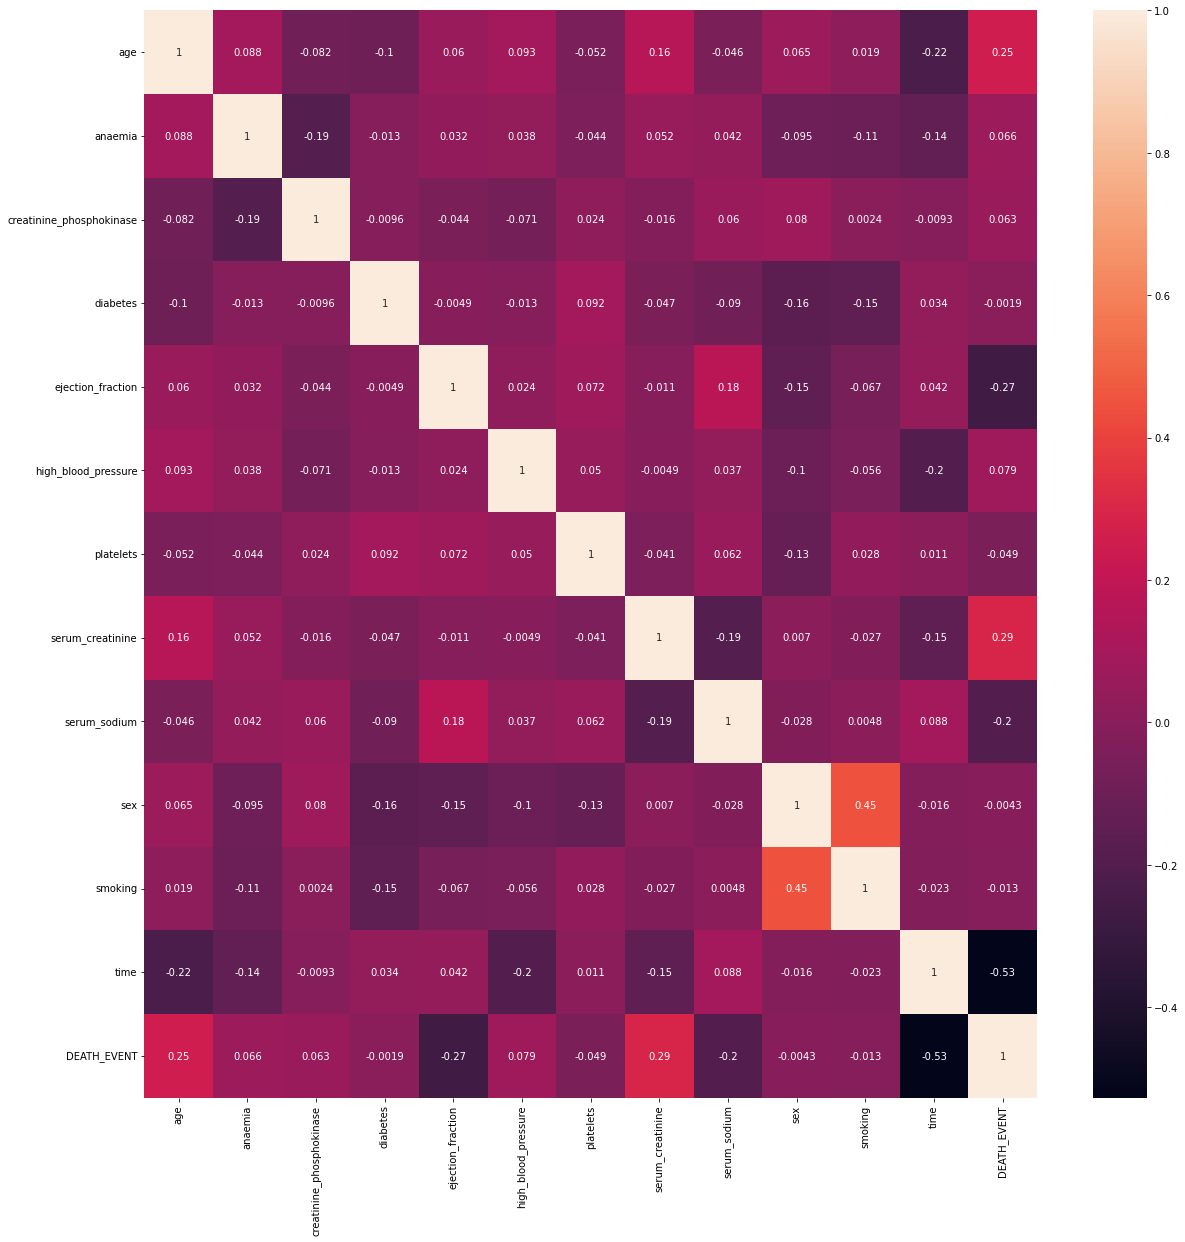

In [11]:
corr=data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [12]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


# Model Building

In [13]:
from sklearn.model_selection import train_test_split

x=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=0)
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (209, 12)
y_train:  (209,)
x_test:  (90, 12)
y_test:  (90,)


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test, y_pred):
    print('Accuracy score: ',accuracy_score(y_test,y_pred))
    print('Precision score: ',precision_score(y_test,y_pred))
    print('Recall score: ',recall_score(y_test,y_pred))
    print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

In [15]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression(max_iter=1000)
lr_clf.fit(x_train, y_train)

lr_clf_pred=lr_clf.predict(x_test)

In [16]:
y_pred=lr_clf.predict(x_test)
evaluating_model(y_test, y_pred)

Accuracy score:  0.7888888888888889
Precision score:  0.7647058823529411
Recall score:  0.4642857142857143
Confusion matrix:  [[58  4]
 [15 13]]


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip=make_pipeline(StandardScaler(), LogisticRegression())
lr_clf_pip.fit(x_train, y_train)

y_pred1=lr_clf_pip.predict(x_test)
evaluating_model(y_test, y_pred1)

Accuracy score:  0.8111111111111111
Precision score:  0.7894736842105263
Recall score:  0.5357142857142857
Confusion matrix:  [[58  4]
 [13 15]]


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1, 1, 10, 100, 1000],
           'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [19]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [20]:
svc=SVC(C=10, gamma=0.0001)
svc.fit(x_train, y_train)
y_pred2=svc.predict(x_test)
evaluating_model(y_test, y_pred2)

Accuracy score:  0.6777777777777778
Precision score:  0.4
Recall score:  0.07142857142857142
Confusion matrix:  [[59  3]
 [26  2]]


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomazid_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf=RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(x_train, y_train)
    best_model=rand_clf.best_estimator_
    best_score=rand_clf.best_score_
    
    print("Training score: {:.3f}".format(best_score))
    y_pred=best_model.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    print("Test score: {:.3f}".format(accuracy))
    
    return best_model

randomazid_search(params={'criterion':['entropy','gini'],
                          'splitter':['random','best'],
                         'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01],
                         'min_samples_split':[2,3,4,5,6,8,10],
                         'min_samples_leaf':[1,0.01,0.02,0.03,0.04],
                         'min_impurity_decrease':[0.0,0.0005,0.005,0.05,0.10,0.15,0.20],
                         'max_leaf_nodes':[10,15,20,25,30,35,40,45,50,None],
                         'max_features':['auto',0.95,0.90,0.85,0.80,0.75,0.70],
                         'max_depth':[None,2,4,6,8],
                         'min_weight_fraction_leaf':[0.0,0.0025,0.0050,0.0075,0.01,0.05]})

Training score: 0.847
Test score: 0.756


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [22]:
ds_clf=DecisionTreeClassifier(max_depth=8, max_features=0.9,
                       max_leaf_nodes=30, min_impurity_decrease=0.05,min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')
ds_clf.fit(x_train, y_train)
pred4=ds_clf.predict(x_test)
evaluating_model(y_test, pred4)

Accuracy score:  0.8111111111111111
Precision score:  0.72
Recall score:  0.6428571428571429
Confusion matrix:  [[55  7]
 [10 18]]


In [23]:
from sklearn.ensemble import RandomForestClassifier

randomazid_search(params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
                         'min_impurity_decrease':[0.0,0.01,0.05,0.10,0.15,0.20],
                         'max_features':['auto',0.8,0.7,0.6,0.5,0.4],
                         'max_depth':[None,2,4,6,8,10,20],}, clf=RandomForestClassifier(random_state=2))

Training score: 0.847
Test score: 0.867


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [24]:
rf_clf=RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)
rf_clf.fit(x_train, y_train)
pred5=rf_clf.predict(x_test)
evaluating_model(y_test, pred5)

Accuracy score:  0.8666666666666667
Precision score:  0.9
Recall score:  0.6428571428571429
Confusion matrix:  [[60  2]
 [10 18]]


In [25]:
from xgboost import XGBClassifier
xgb1=XGBClassifier(colsample_bytree=1.0,
                  learning_rate=0.1,
                  max_depth=4,
                  n_estimators=400,
                  subsample=1.0)
eval_set=[(x_test, y_test)]
xgb1.fit(x_train, y_train, early_stopping_rounds=10,eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.63929
[1]	validation_0-logloss:0.59762
[2]	validation_0-logloss:0.56422
[3]	validation_0-logloss:0.53184
[4]	validation_0-logloss:0.50465
[5]	validation_0-logloss:0.48130
[6]	validation_0-logloss:0.46135
[7]	validation_0-logloss:0.44722
[8]	validation_0-logloss:0.43508
[9]	validation_0-logloss:0.42311
[10]	validation_0-logloss:0.40869
[11]	validation_0-logloss:0.39828
[12]	validation_0-logloss:0.39094
[13]	validation_0-logloss:0.38523
[14]	validation_0-logloss:0.37836
[15]	validation_0-logloss:0.37250
[16]	validation_0-logloss:0.36963
[17]	validation_0-logloss:0.36676


C:\Users\Sandeep\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Sandeep\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.36467
[19]	validation_0-logloss:0.36335
[20]	validation_0-logloss:0.36152
[21]	validation_0-logloss:0.36137
[22]	validation_0-logloss:0.35676
[23]	validation_0-logloss:0.35485
[24]	validation_0-logloss:0.35313
[25]	validation_0-logloss:0.34993
[26]	validation_0-logloss:0.34873
[27]	validation_0-logloss:0.34697
[28]	validation_0-logloss:0.34448
[29]	validation_0-logloss:0.34190
[30]	validation_0-logloss:0.34213
[31]	validation_0-logloss:0.34117
[32]	validation_0-logloss:0.33854
[33]	validation_0-logloss:0.33701
[34]	validation_0-logloss:0.33778
[35]	validation_0-logloss:0.33757
[36]	validation_0-logloss:0.33578
[37]	validation_0-logloss:0.33511
[38]	validation_0-logloss:0.33418
[39]	validation_0-logloss:0.33277
[40]	validation_0-logloss:0.33211
[41]	validation_0-logloss:0.32965
[42]	validation_0-logloss:0.32868
[43]	validation_0-logloss:0.32739
[44]	validation_0-logloss:0.32850
[45]	validation_0-logloss:0.32888
[46]	validation_0-logloss:0.33055
[47]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [26]:
pred6=xgb1.predict(x_test)
evaluating_model(y_test, pred6)

Accuracy score:  0.8555555555555555
Precision score:  0.8
Recall score:  0.7142857142857143
Confusion matrix:  [[57  5]
 [ 8 20]]


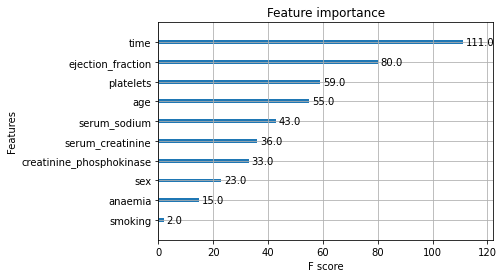

In [27]:
from xgboost import plot_importance

plot_importance(xgb1)
plt.show()

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt=GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0)
gbdt.fit(x_train, y_train)

pred_gdbt=gbdt.predict(x_test)
evaluating_model(y_test, pred_gdbt)

Accuracy score:  0.8555555555555555
Precision score:  0.8571428571428571
Recall score:  0.6428571428571429
Confusion matrix:  [[59  3]
 [10 18]]


# Choosing best model

In [29]:
import joblib
joblib.dump(xgb1, 'model.pkl')
model=joblib.load('model.pkl')
model.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])